In [1]:
import pandas as pd

In [12]:
df2 = pd.DataFrame()

In [376]:
name_dataset = "rounD-dataset-v1.0"
for i in range(24):
    num_csv = f"0{i}" if len(str(i)) != 2 else str(i)
    path = f"check_dist2/{name_dataset}_" + num_csv + "_dist.csv"
    dist = pd.read_csv(path)
    track = f"../lololol/data/datasets/{name_dataset}/data/" + num_csv + "_tracks.csv"
    labels_csv = f'output/{name_dataset}_{num_csv}_dataset.csv'
    track = pd.read_csv(track)
    labels = pd.read_csv(labels_csv)
    df = labels.reset_index().merge(track.reset_index(), on=['trackId', 'frame'])
    df = df.reset_index().merge(dist.reset_index(), on=['trackId', 'frame'])
    df2 = pd.concat([df2, df], ignore_index=True)
#     df = pd.concat([df, df2], ignore_index=True)

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:9199: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [46]:
column3 = ['trackLifetime', 'xCenter', 'yCenter', 'heading', 'width', 'length', 'xVelocity', 'yVelocity', 
         'xAcceleration', 'yAcceleration', 'lonVelocity','latVelocity', 'lonAcceleration', 'latAcceleration', 
          '1_yVelocity', '1_xVelocity', '1_yAcceleration', '1_xAcceleration', '1_xCenter', '1_yCenter',
           '2_yVelocity', '2_xVelocity', '2_yAcceleration', '2_xAcceleration', '2_xCenter', '2_yCenter',
           '3_yVelocity', '3_xVelocity', '3_yAcceleration', '3_xAcceleration', '3_xCenter', '3_yCenter',
          '3_distance', '2_distance', '1_distance', 'label', 'class']

In [103]:
column2 = ['trackLifetime', 'xCenter', 'yCenter', 'heading', 'width', 'length', 'xVelocity', 'yVelocity', 
         'xAcceleration', 'yAcceleration', 'lonVelocity','latVelocity', 'lonAcceleration', 'latAcceleration', 
          '1_yVelocity', '1_xVelocity', '1_yAcceleration', '1_xAcceleration', '1_xCenter', '1_yCenter',
           '2_yVelocity', '2_xVelocity', '2_yAcceleration', '2_xAcceleration', '2_xCenter', '2_yCenter',
           '3_yVelocity', '3_xVelocity', '3_yAcceleration', '3_xAcceleration', '3_xCenter', '3_yCenter',
          '3_distance', '2_distance', '1_distance']

In [47]:
df3 = df2[column3]

In [48]:
Y = df3['label']

In [49]:
X = df3.drop('label', axis=1)

In [50]:
y,class_names = pd.factorize(Y)

In [51]:
a = {item: index for index, item in enumerate(class_names)}

In [52]:
import json 

In [53]:
with open(f'rounD-dataset-v1.0_classe.json', 'w') as f:
    json.dump(a, f)

In [57]:
df4 = df3[df3['class'] == 'bus']

In [85]:
df4['label'].value_counts() #bus

slower             415
faster             195
easy-turn-right     89
still               50
turn-right          50
constant-speed      22
turn-left           17
easy-turn-left       6
Name: label, dtype: int64

In [91]:
df4["label"] = df4["label"].map(lambda x : a[str(x)])

In [93]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [98]:
with open(f'bus-round-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)

In [99]:
params

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 9}

In [100]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=9,
                       random_state=42)

In [101]:
#bus
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.89
Confusion Matrix: 
 [[274  31   0   6   0   0   0   0]
 [ 21 125   0   0   0   0   0   0]
 [  0   1   3   0   0   0   0   0]
 [  9   4   0  54   0   0   0   0]
 [  0   0   0   0  13   0   0   0]
 [  0   0   0   0   0  17   0   0]
 [  0   0   0   0   0   0  38   0]
 [  0   0   0   0   0   0   0  37]]
                 precision    recall  f1-score   support

         slower       0.90      0.88      0.89       311
         faster       0.78      0.86      0.81       146
 easy-turn-left       1.00      0.75      0.86         4
easy-turn-right       0.90      0.81      0.85        67
      turn-left       1.00      1.00      1.00        13
 constant-speed       1.00      1.00      1.00        17
     turn-right       1.00      1.00      1.00        38
          still       1.00      1.00      1.00        37

       accuracy                           0.89       633
      macro avg       0.95      0.91      0.93       633
   weighted avg       0.89      0.89      0.89       63

In [102]:
#bus
y_pred=classifier.predict(X_test)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.81
Confusion Matrix: 
 [[91  9  0  4  0  0  0  0]
 [13 36  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0]
 [ 6  5  0 11  0  0  0  0]
 [ 0  0  0  0  4  0  0  0]
 [ 0  0  0  0  1  4  0  0]
 [ 0  0  0  0  1  0 11  0]
 [ 0  0  0  0  0  0  0 13]]
                 precision    recall  f1-score   support

         slower       0.82      0.88      0.85       104
         faster       0.71      0.73      0.72        49
 easy-turn-left       0.00      0.00      0.00         2
easy-turn-right       0.73      0.50      0.59        22
      turn-left       0.67      1.00      0.80         4
 constant-speed       1.00      0.80      0.89         5
     turn-right       1.00      0.92      0.96        12
          still       1.00      1.00      1.00        13

       accuracy                           0.81       211
      macro avg       0.74      0.73      0.73       211
   weighted avg       0.80      0.81      0.80       211



/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
import graphviz
from sklearn import tree
feature_names = column2
dot_data = tree.export_graphviz(classifier, out_file='bus_round.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)

In [105]:
g = graphviz.Source(dot_data)

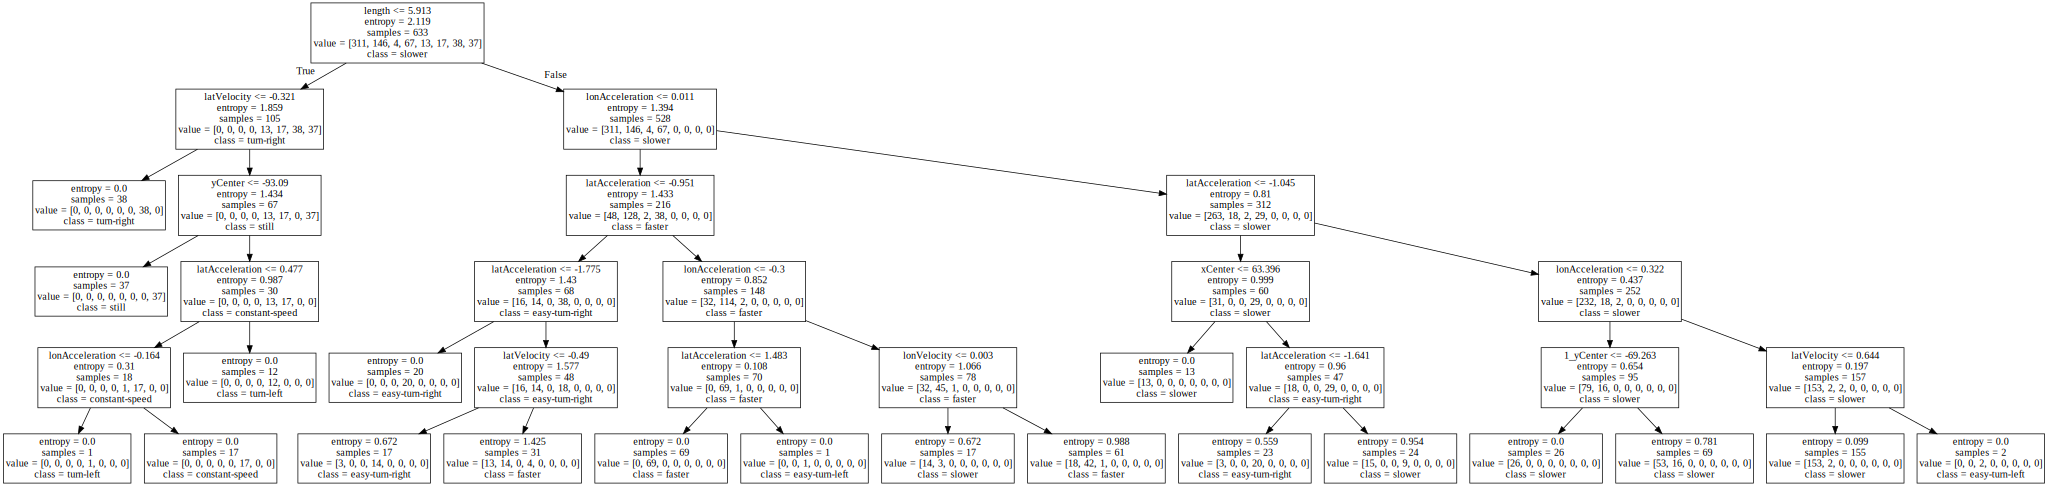

In [107]:
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [108]:
from sklearn2pmml.pipeline import PMMLPipeline

pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])

In [109]:
pipeline.fit(X_train, y_train)

PMMLPipeline(steps=[('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=9,
                       random_state=42))])

In [110]:
from sklearn2pmml import sklearn2pmml

sklearn2pmml(pipeline, "bus_round.pmml", with_repr = True)

In [118]:
df4 = df3[(df3['class'] == 'motorcycle') | (df3['class'] == 'bicycle')]

In [135]:
df4['label'].value_counts()

slower             1754
faster             1053
easy-turn-right     352
easy-turn-left      142
still                47
turn-right           31
constant-speed       21
turn-left            17
Name: label, dtype: int64

In [136]:
df4["label"] = df4["label"].map(lambda x : a[str(x)])

In [137]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [146]:
with open(f'bicycle-round-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)

In [147]:
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42)

In [148]:
#motorcycle
y_pred_train =classifier.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.81
Confusion Matrix: 
 [[1119  171    6   19    0    0    0    0]
 [ 131  608   34   17    0    0    0    0]
 [  49    4   53    0    0    0    0    0]
 [  30   30    0  204    0    0    0    0]
 [   0    0    0    0   13    0    0    0]
 [   1    0    0    0    0   15    0    0]
 [   3    0    0    0    0    0   20    0]
 [   0    0    0    0    0    0    0   35]]
                 precision    recall  f1-score   support

         slower       0.84      0.85      0.85      1315
         faster       0.75      0.77      0.76       790
 easy-turn-left       0.57      0.50      0.53       106
easy-turn-right       0.85      0.77      0.81       264
      turn-left       1.00      1.00      1.00        13
 constant-speed       1.00      0.94      0.97        16
     turn-right       1.00      0.87      0.93        23
          still       1.00      1.00      1.00        35

       accuracy                           0.81      2562
      macro avg       0.88      0.84      0.86  

In [149]:
#motorcycle
y_pred=classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.79
Confusion Matrix: 
 [[371  55   3  10   0   0   0   0]
 [ 38 208  12   5   0   0   0   0]
 [ 17   3  16   0   0   0   0   0]
 [ 18  12   0  58   0   0   0   0]
 [  0   0   1   0   3   0   0   0]
 [  1   0   0   0   0   4   0   0]
 [  2   0   0   0   0   0   6   0]
 [  0   0   0   0   0   0   0  12]]
                 precision    recall  f1-score   support

         slower       0.83      0.85      0.84       439
         faster       0.75      0.79      0.77       263
 easy-turn-left       0.50      0.44      0.47        36
easy-turn-right       0.79      0.66      0.72        88
      turn-left       1.00      0.75      0.86         4
 constant-speed       1.00      0.80      0.89         5
     turn-right       1.00      0.75      0.86         8
          still       1.00      1.00      1.00        12

       accuracy                           0.79       855
      macro avg       0.86      0.75      0.80       855
   weighted avg       0.79      0.79      0.79       85

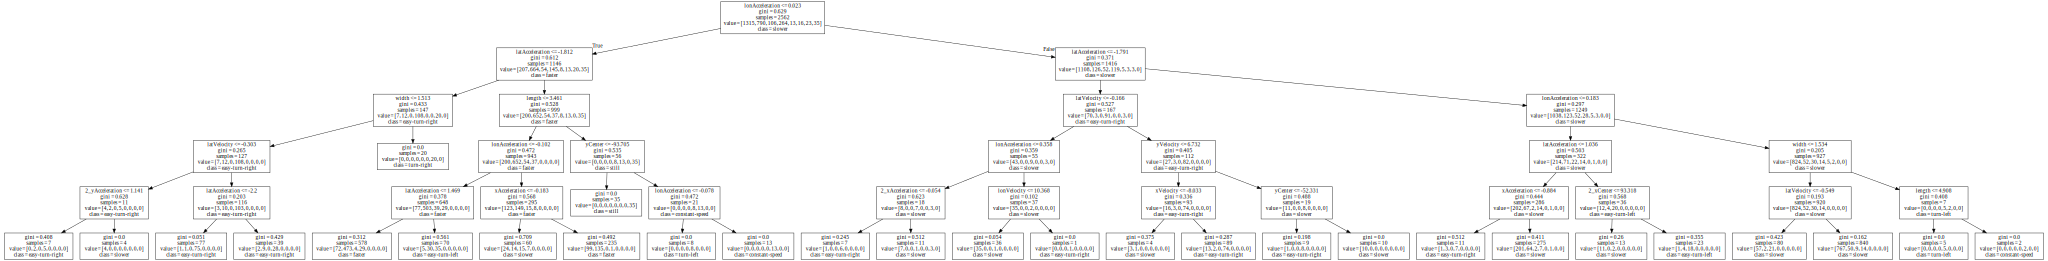

In [150]:
feature_names = column2
dot_data = tree.export_graphviz(classifier, out_file='bicycle_round.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
g = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [151]:
from sklearn2pmml.pipeline import PMMLPipeline

pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])
pipeline.fit(X_train, y_train)

PMMLPipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42))])

In [152]:
from sklearn2pmml import sklearn2pmml

sklearn2pmml(pipeline, "bicycle_round.pmml", with_repr = True)

In [173]:
df4 = df3[df3['class'] == 'trailer']
df4["label"] = df4["label"].map(lambda x : a[str(x)])

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [168]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)
with open(f'trailer-round-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [169]:
#trailer
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.89
Confusion Matrix: 
 [[   7    0    0    0    0    0    0    0]
 [   0   28    0    1  101    1    0    0]
 [   0    0  553   11   23    2    0    0]
 [   0   14   28  455  148    0    0    0]
 [   0    6   96   91 1327    0    0    0]
 [   0    0    0    1    1 1961    0    0]
 [   0    0    0    1    1    3    0    0]
 [   0    1    2    1    0    1    0    0]]
                 precision    recall  f1-score   support

         slower       1.00      1.00      1.00         7
         faster       0.57      0.21      0.31       131
 easy-turn-left       0.81      0.94      0.87       589
easy-turn-right       0.81      0.71      0.75       645
      turn-left       0.83      0.87      0.85      1520
 constant-speed       1.00      1.00      1.00      1963
     turn-right       0.00      0.00      0.00         5
          still       0.00      0.00      0.00         5

       accuracy                           0.89      4865
      macro avg       0.63      0.59      0.60  

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
#trailer
y_pred=classifier.predict(X_test)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.86
Confusion Matrix: 
 [[  2   0   0   0   0   0   0   0]
 [  0  10   1   2  29   1   0   0]
 [  0   0 170   7  18   2   0   0]
 [  0   7  14 135  58   1   0   0]
 [  0   3  33  41 430   0   0   0]
 [  0   0   0   0   0 654   0   0]
 [  0   1   1   0   0   0   0   0]
 [  0   0   1   1   0   0   0   0]]
                 precision    recall  f1-score   support

         slower       1.00      1.00      1.00         2
         faster       0.48      0.23      0.31        43
 easy-turn-left       0.77      0.86      0.82       197
easy-turn-right       0.73      0.63      0.67       215
      turn-left       0.80      0.85      0.83       507
 constant-speed       0.99      1.00      1.00       654
     turn-right       0.00      0.00      0.00         2
          still       0.00      0.00      0.00         2

       accuracy                           0.86      1622
      macro avg       0.60      0.57      0.58      1622
   weighted avg       0.86      0.86      0.86      162

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


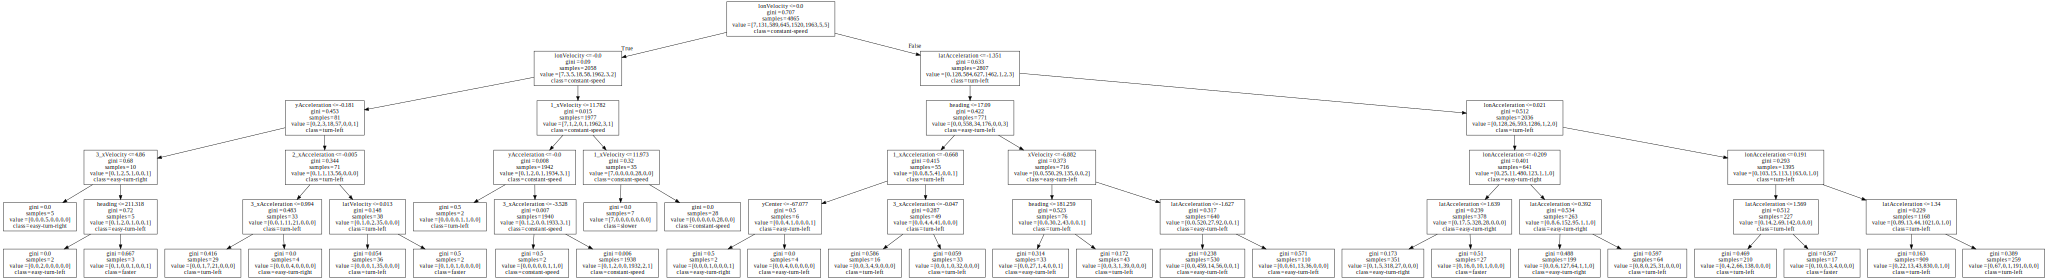

In [171]:
feature_names = column2
dot_data = tree.export_graphviz(classifier, out_file='trailer_round.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
g = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [172]:
pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])
pipeline.fit(X_train, y_train)
sklearn2pmml(pipeline, "trailer_round.pmml", with_repr = True)

In [175]:
df4 = df3[df3['class'] == 'van']

In [225]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)
with open(f'van-round-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [226]:
#van
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.86
Confusion Matrix: 
 [[   4    0    0    5    8    4    0    0]
 [   0   30    0   25  190    0    0    0]
 [   0    0 1654   88   84    0    0    0]
 [   0   20   89 2740  556    0    0    0]
 [   0    3  381  749 5830    2    0    0]
 [   0    0    0    3    2 3315    0    0]
 [   0    6    0    0    5    0   25    0]
 [   0    0   10   14    0    0    0   36]]
                 precision    recall  f1-score   support

         slower       1.00      0.19      0.32        21
         faster       0.51      0.12      0.20       245
 easy-turn-left       0.78      0.91      0.84      1826
easy-turn-right       0.76      0.80      0.78      3405
      turn-left       0.87      0.84      0.85      6965
 constant-speed       1.00      1.00      1.00      3320
     turn-right       1.00      0.69      0.82        36
          still       1.00      0.60      0.75        60

       accuracy                           0.86     15878
      macro avg       0.86      0.64      0.69  

In [227]:
#van
y_pred=classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.85
Confusion Matrix: 
 [[   0    0    0    3    4    0    0    0]
 [   0   10    0    7   65    0    0    0]
 [   0    0  544   35   26    0    1    2]
 [   0    6   28  885  216    0    0    0]
 [   0    0  118  256 1947    1    0    0]
 [   0    0    0    0    0 1107    0    0]
 [   0    2    0    0    3    0    7    0]
 [   0    0    6    2    0    0    0   12]]
                 precision    recall  f1-score   support

         slower       0.00      0.00      0.00         7
         faster       0.56      0.12      0.20        82
 easy-turn-left       0.78      0.89      0.83       608
easy-turn-right       0.74      0.78      0.76      1135
      turn-left       0.86      0.84      0.85      2322
 constant-speed       1.00      1.00      1.00      1107
     turn-right       0.88      0.58      0.70        12
          still       0.86      0.60      0.71        20

       accuracy                           0.85      5293
      macro avg       0.71      0.60      0.63  

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


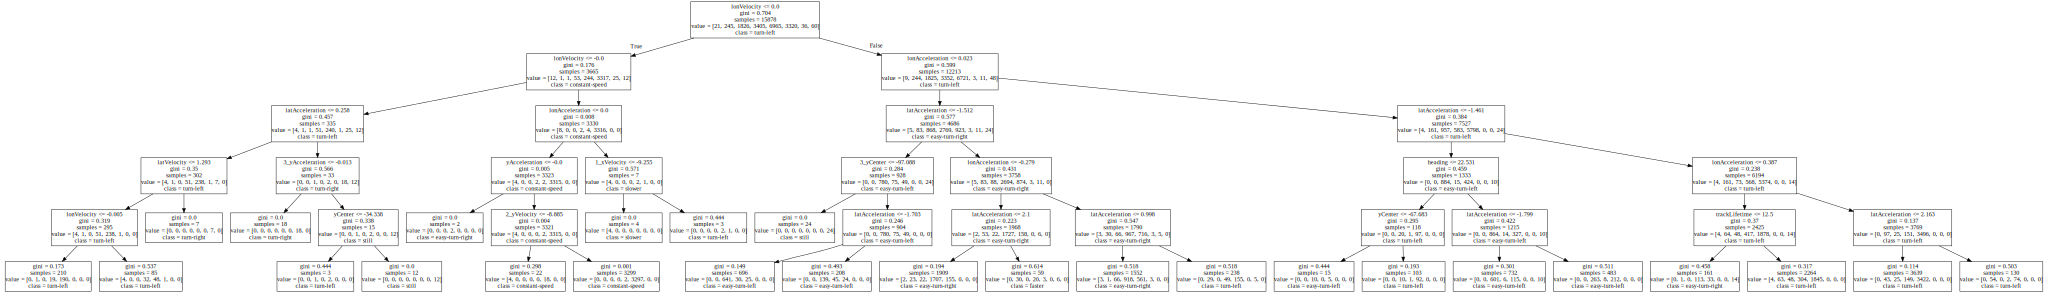

In [228]:
feature_names = column2
dot_data = tree.export_graphviz(classifier, out_file='van_round.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
g = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [229]:
pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])
pipeline.fit(X_train, y_train)
sklearn2pmml(pipeline, "van_round.pmml", with_repr = True)

In [230]:
df4 = df3[df3['class'] == 'truck']

In [246]:
df4['label'].value_counts()

slower             9287
faster             4540
still              4427
easy-turn-right    2434
easy-turn-left      327
constant-speed       35
turn-left            30
turn-right           20
Name: label, dtype: int64

In [247]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)
with open(f'truck-round-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)




DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=8,
                       random_state=42)

In [248]:
#truck
y_pred_train =classifier.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.88
Confusion Matrix: 
 [[  12    0    0    7    7    0    0    0]
 [   0  122    0   24   99    0    0    0]
 [   0    0 1611   32  182    0    0    1]
 [   0   18   51 2728  608    0    0    0]
 [   0   47  184  632 6099    0    1    2]
 [   0    0    0    3    4 3313    0    0]
 [   0    0    0    0    0    0   23    0]
 [   0    0    4    2    0    0    0    9]]
                 precision    recall  f1-score   support

         slower       1.00      0.46      0.63        26
         faster       0.65      0.50      0.56       245
 easy-turn-left       0.87      0.88      0.88      1826
easy-turn-right       0.80      0.80      0.80      3405
      turn-left       0.87      0.88      0.87      6965
 constant-speed       1.00      1.00      1.00      3320
     turn-right       0.96      1.00      0.98        23
          still       0.75      0.60      0.67        15

       accuracy                           0.88     15825
      macro avg       0.86      0.76      0.80  

In [249]:
#truck
y_pred=classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.85
Confusion Matrix: 
 [[   3    0    0    3    3    0    0    0]
 [   0   26    0    9   47    0    0    0]
 [   0    0  518   10   77    0    1    2]
 [   0    7   19  873  235    0    0    1]
 [   1   26   67  253 1971    1    0    3]
 [   2    0    0    0    1 1104    0    0]
 [   0    0    0    0    0    0    7    0]
 [   0    0    0    2    0    0    0    3]]
                 precision    recall  f1-score   support

         slower       0.50      0.33      0.40         9
         faster       0.44      0.32      0.37        82
 easy-turn-left       0.86      0.85      0.85       608
easy-turn-right       0.76      0.77      0.76      1135
      turn-left       0.84      0.85      0.85      2322
 constant-speed       1.00      1.00      1.00      1107
     turn-right       0.88      1.00      0.93         7
          still       0.33      0.60      0.43         5

       accuracy                           0.85      5275
      macro avg       0.70      0.71      0.70  

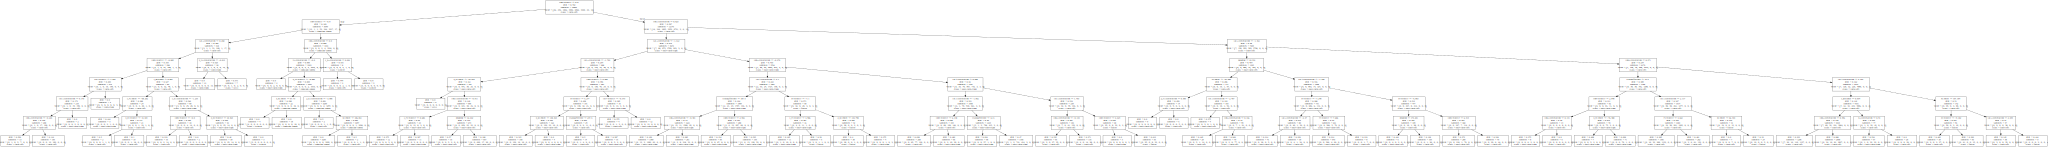

In [250]:
feature_names = column2
dot_data = tree.export_graphviz(classifier, out_file='truck_round.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
g = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [251]:
pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])
pipeline.fit(X_train, y_train)
sklearn2pmml(pipeline, "truck_round.pmml", with_repr = True)

In [252]:
df4 = df3[df3['class'] == 'car']

In [253]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)
with open(f'car-round-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                       random_state=42)

In [254]:
#car
y_pred_train =classifier.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.88
Confusion Matrix: 
 [[    0     0     0     7     9     0     0     0]
 [    0  6023     0   246  2269     0     0     0]
 [    0     1 25798   302   915     0     0    20]
 [    0   298   366 23886  4137     0     0     0]
 [    0  1457  1037  3436 51800     0     0     0]
 [    0     0     0     0     0  3855     0     0]
 [    0     9     0     2     2     0     0     0]
 [    0     0   128     5     5     0     0   203]]


/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

         slower       0.00      0.00      0.00        16
         faster       0.77      0.71      0.74      8538
 easy-turn-left       0.94      0.95      0.95     27036
easy-turn-right       0.86      0.83      0.84     28687
      turn-left       0.88      0.90      0.89     57730
 constant-speed       1.00      1.00      1.00      3855
     turn-right       0.00      0.00      0.00        13
          still       0.91      0.60      0.72       341

       accuracy                           0.88    126216
      macro avg       0.67      0.62      0.64    126216
   weighted avg       0.88      0.88      0.88    126216



/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
#car
y_pred=classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.88
Confusion Matrix: 
 [[    0     0     0     3     3     0     0     0]
 [    0  1871     0   104   871     0     0     0]
 [    0     0  8539   121   337     0     0    15]
 [    0   108   123  7975  1356     0     0     0]
 [    0   563   442  1144 17093     1     0     0]
 [    0     0     0     0     0  1285     0     0]
 [    0     3     0     1     0     0     0     0]
 [    0     0    56     3     3     0     0    52]]


/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

         slower       0.00      0.00      0.00         6
         faster       0.74      0.66      0.69      2846
 easy-turn-left       0.93      0.95      0.94      9012
easy-turn-right       0.85      0.83      0.84      9562
      turn-left       0.87      0.89      0.88     19243
 constant-speed       1.00      1.00      1.00      1285
     turn-right       0.00      0.00      0.00         4
          still       0.78      0.46      0.57       114

       accuracy                           0.88     42072
      macro avg       0.65      0.60      0.62     42072
   weighted avg       0.87      0.88      0.87     42072



/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


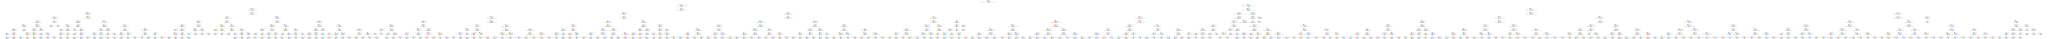

In [256]:
feature_names = column2
dot_data = tree.export_graphviz(classifier, out_file='car_round.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
g = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [257]:
pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])
pipeline.fit(X_train, y_train)
sklearn2pmml(pipeline, "car_round.pmml", with_repr = True)

In [276]:
df4 = df3

In [377]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)
with open(f'all-round-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=9, random_state=42)

In [378]:
#all
y_pred=classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.91
Confusion Matrix: 
 [[20351  5443   150   140     4     0     4     1]
 [ 4669 20592    97    62     5     0     2     0]
 [  346   254   853     1    12     0     0     0]
 [  326   230     0   866     0     0    33     0]
 [   50    60    58     0    41     0     0     0]
 [    0     1     0     0     0     0     0     1]
 [   39    37     0   128     0     0    98     0]
 [    0     0     0     0     0     0     0 85021]]
                 precision    recall  f1-score   support

         slower       0.79      0.78      0.78     26093
         faster       0.77      0.81      0.79     25427
 easy-turn-left       0.74      0.58      0.65      1466
easy-turn-right       0.72      0.60      0.65      1455
      turn-left       0.66      0.20      0.30       209
 constant-speed       0.00      0.00      0.00         2
     turn-right       0.72      0.32      0.45       302
          still       1.00      1.00      1.00     85021

       accuracy                          

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [379]:
#all
y_pred_train =classifier.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.92
Confusion Matrix: 
 [[ 61596  16006    316    348      6      0      5      0]
 [ 13519  62370    238    146      7      0      1      0]
 [   833    749   2795      1     19      0      0      0]
 [   868    716      1   2712      1      0     67      0]
 [   128    162    146      0    192      0      0      0]
 [     3      4      0      0      0      1      0      0]
 [   108    141      0    293      0      0    362      0]
 [     0      3      0      0      0      0      0 255059]]
                 precision    recall  f1-score   support

         slower       0.80      0.79      0.79     78277
         faster       0.78      0.82      0.80     76281
 easy-turn-left       0.80      0.64      0.71      4397
easy-turn-right       0.77      0.62      0.69      4365
      turn-left       0.85      0.31      0.45       628
 constant-speed       1.00      0.12      0.22         8
     turn-right       0.83      0.40      0.54       904
          still       1.00      1.0

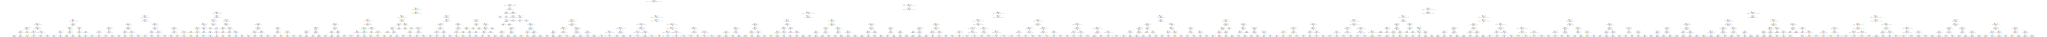

In [380]:

feature_names = X.columns
dot_data = tree.export_graphviz(classifier, out_file='all_round.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
g = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [381]:
pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])
pipeline.fit(X_train, y_train)
sklearn2pmml(pipeline, "all_round.pmml", with_repr = True)

In [286]:
df2 = pd.DataFrame()

In [287]:
name_dataset = "inD-dataset-v1.0"
for i in range(33):
    num_csv = f"0{i}" if len(str(i)) != 2 else str(i)
    path = f"check_dist2/{name_dataset}_" + num_csv + "_dist.csv"
    dist = pd.read_csv(path)
    track = f"../lololol/data/datasets/{name_dataset}/data/" + num_csv + "_tracks.csv"
    labels_csv = f'output/{name_dataset}_{num_csv}_dataset.csv'
    track = pd.read_csv(track)
    labels = pd.read_csv(labels_csv)
    df = labels.reset_index().merge(track.reset_index(), on=['trackId', 'frame'])
    df = df.reset_index().merge(dist.reset_index(), on=['trackId', 'frame'])
    df2 = pd.concat([df2, df], ignore_index=True)
#     df = pd.concat([df, df2], ignore_index=True)

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:9199: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [288]:
df3 = df2[column3]

In [289]:
df2['class'].value_counts()

car           420455
pedestrian    101895
bicycle        33182
truck_bus       4365
Name: class, dtype: int64

In [292]:
df4 = df3[df3['class'] == 'truck_bus']


In [310]:
df4["label"] = df4["label"].map(lambda x : a[str(x)])

In [312]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)
with open(f'truck_bus-inD-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=4, random_state=42)

In [313]:
#truck_bus
y_pred=classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.88
Confusion Matrix: 
 [[439  58   2   3   0   0   0   1]
 [ 57 338   1   1   0   0   0   0]
 [  3   2  11   0   0   0   0   0]
 [  0   3   0  12   0   0   1   0]
 [  0   0   2   0  23   0   0   0]
 [  0   0   0   0   0   0   0   1]
 [  1   0   0   4   0   0  15   0]
 [  1   0   0   0   0   0   0 178]]
                 precision    recall  f1-score   support

         slower       0.88      0.87      0.87       503
         faster       0.84      0.85      0.85       397
 easy-turn-left       0.69      0.69      0.69        16
easy-turn-right       0.60      0.75      0.67        16
      turn-left       1.00      0.92      0.96        25
 constant-speed       0.00      0.00      0.00         1
     turn-right       0.94      0.75      0.83        20
          still       0.99      0.99      0.99       179

       accuracy                           0.88      1157
      macro avg       0.74      0.73      0.73      1157
   weighted avg       0.88      0.88      0.88      115

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [314]:
#truck_bus
y_pred_train =classifier.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.91
Confusion Matrix: 
 [[1365  138    5    2    0    0    0    0]
 [ 153 1035    0    1    0    0    0    0]
 [   3    2   42    0    0    0    0    0]
 [   3    0    0   44    0    0    1    0]
 [   0    0    1    0   75    0    0    0]
 [   0    0    0    0    0    0    1    2]
 [   0    0    0    1    0    0   58    0]
 [   2    0    0    0    0    0    0  534]]
                 precision    recall  f1-score   support

         slower       0.89      0.90      0.90      1510
         faster       0.88      0.87      0.88      1189
 easy-turn-left       0.88      0.89      0.88        47
easy-turn-right       0.92      0.92      0.92        48
      turn-left       1.00      0.99      0.99        76
 constant-speed       0.00      0.00      0.00         3
     turn-right       0.97      0.98      0.97        59
          still       1.00      1.00      1.00       536

       accuracy                           0.91      3468
      macro avg       0.82      0.82      0.82  

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


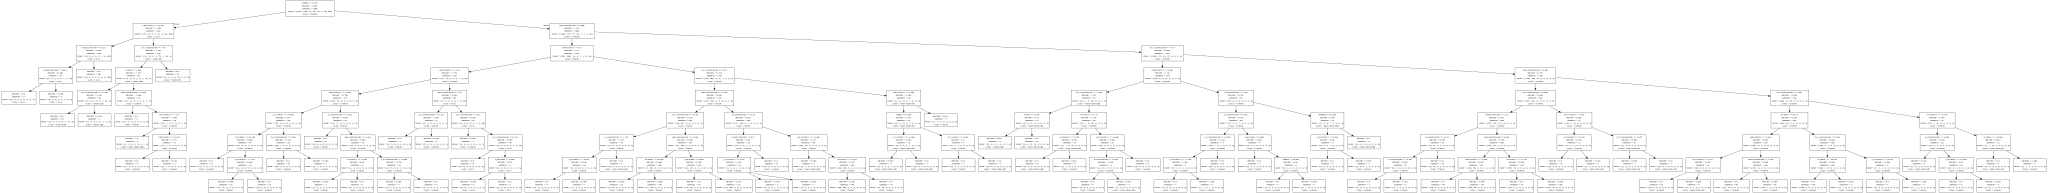

In [316]:

feature_names = X.columns
dot_data = tree.export_graphviz(classifier, out_file='truck_bus_ind.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
g = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [317]:
pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])
pipeline.fit(X_train, y_train)
sklearn2pmml(pipeline, "truck_bus_ind.pmml", with_repr = True)

In [318]:
df4 = df3[df3['class'] == 'bicycle']




In [340]:
df4["label"] = df4["label"].map(lambda x : a[str(x)])

In [343]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)
with open(f'bicycle-inD-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [344]:
#bicycle
y_pred=classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.82
Confusion Matrix: 
 [[3261  614   29   48    1    0    0    0]
 [ 481 3057   29   20    1    0    0    1]
 [  43   60  215    0    3    0    0    0]
 [ 109   45    0  229    0    0    2    0]
 [   4    2    7    0    3    0    0    0]
 [   3    0    0    0    0    4    0    0]
 [   4    7    0   16    0    0    4    0]
 [   0    0    0    0    0    0    0   21]]
                 precision    recall  f1-score   support

         slower       0.84      0.82      0.83      3953
         faster       0.81      0.85      0.83      3589
 easy-turn-left       0.77      0.67      0.72       321
easy-turn-right       0.73      0.59      0.66       385
      turn-left       0.38      0.19      0.25        16
 constant-speed       1.00      0.57      0.73         7
     turn-right       0.67      0.13      0.22        31
          still       0.95      1.00      0.98        21

       accuracy                           0.82      8323
      macro avg       0.77      0.60      0.65  

In [345]:
#bicycle
y_pred_train =classifier.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.83
Confusion Matrix: 
 [[9944 1796   42   76    0    0    1    0]
 [1460 9236   35   34    0    0    2    0]
 [ 103  135  721    0    5    0    0    0]
 [ 199  132    0  820    0    0    4    0]
 [   8   11   11    0   17    0    0    0]
 [   5    2    0    0    0   12    0    0]
 [  13   15    0   53    0    0   12    0]
 [   0    0    0    0    0    0    0   65]]
                 precision    recall  f1-score   support

         slower       0.85      0.84      0.84     11859
         faster       0.82      0.86      0.84     10767
 easy-turn-left       0.89      0.75      0.81       964
easy-turn-right       0.83      0.71      0.77      1155
      turn-left       0.77      0.36      0.49        47
 constant-speed       1.00      0.63      0.77        19
     turn-right       0.63      0.13      0.21        93
          still       1.00      1.00      1.00        65

       accuracy                           0.83     24969
      macro avg       0.85      0.66      0.72  

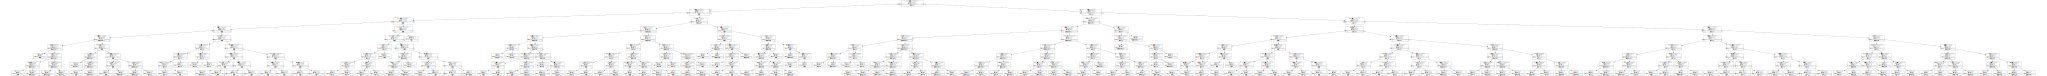

In [346]:

feature_names = X.columns
dot_data = tree.export_graphviz(classifier, out_file='bicycle_ind.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
g = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [347]:
pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])
pipeline.fit(X_train, y_train)
sklearn2pmml(pipeline, "bicycle_ind.pmml", with_repr = True)

In [348]:
df4 = df3[df3['class'] == 'car']

In [356]:
df4["label"] = df4["label"].map(lambda x : a[str(x)])

In [357]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)
with open(f'car-inD-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=3, random_state=42)

In [358]:
#car
y_pred=classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.98
Confusion Matrix: 
 [[ 8640  1029    47    55     0     0     0     0]
 [  914  7941    19    19     0     0     1     0]
 [   49    31   562     0    13     0     0     0]
 [   79    21     0   543     0     0    41     0]
 [    0     0    22     0    46     0     0     0]
 [    2     1     0     0     0     1     0     0]
 [    2     1     0    64     0     0   113     0]
 [    0     0     0     0     0     0     0 84862]]
                 precision    recall  f1-score   support

         slower       0.89      0.88      0.89      9771
         faster       0.88      0.89      0.89      8894
 easy-turn-left       0.86      0.86      0.86       655
easy-turn-right       0.80      0.79      0.80       684
      turn-left       0.78      0.68      0.72        68
 constant-speed       1.00      0.25      0.40         4
     turn-right       0.73      0.63      0.67       180
          still       1.00      1.00      1.00     84862

       accuracy                          

In [359]:
#car
y_pred_train =classifier.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.98
Confusion Matrix: 
 [[ 26351   2777     79    102      0      0      2      0]
 [  2633  23975     34     40      1      0      0      0]
 [   110     71   1777      0      5      0      0      0]
 [   175     46      0   1771      0      0     60      0]
 [     0      0     50      0    153      0      0      0]
 [     4      5      0      0      0      5      0      0]
 [     0      2      0    126      0      0    414      0]
 [     0      2      0      0      0      0      0 254582]]
                 precision    recall  f1-score   support

         slower       0.90      0.90      0.90     29311
         faster       0.89      0.90      0.90     26683
 easy-turn-left       0.92      0.91      0.91      1963
easy-turn-right       0.87      0.86      0.87      2052
      turn-left       0.96      0.75      0.85       203
 constant-speed       1.00      0.36      0.53        14
     turn-right       0.87      0.76      0.81       542
          still       1.00      1.0

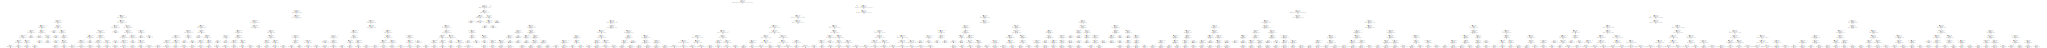

In [360]:

feature_names = X.columns
dot_data = tree.export_graphviz(classifier, out_file='car.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
g = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [361]:
pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])
pipeline.fit(X_train, y_train)
sklearn2pmml(pipeline, "car.pmml", with_repr = True)

In [362]:
df4 = df3

In [363]:
df4["label"] = df4["label"].map(lambda x : a[str(x)])

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [364]:
X = df4.drop(['label', 'class'], axis=1)
y = df4['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)
with open(f'all-inD-dataset-v1.0-.json', 'r') as f:
    params = json.load(f)
classifier = DecisionTreeClassifier(**params, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [365]:
#all
y_pred=classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.91
Confusion Matrix: 
 [[20353  5436   154   141     4     0     4     1]
 [ 4672 20587    99    62     5     0     2     0]
 [  345   253   856     1    11     0     0     0]
 [  326   230     0   864     0     0    35     0]
 [   50    60    58     0    41     0     0     0]
 [    0     1     0     0     0     0     0     1]
 [   38    38     0   128     0     0    98     0]
 [    0     0     0     0     0     1     0 85020]]
                 precision    recall  f1-score   support

         slower       0.79      0.78      0.78     26093
         faster       0.77      0.81      0.79     25427
 easy-turn-left       0.73      0.58      0.65      1466
easy-turn-right       0.72      0.59      0.65      1455
      turn-left       0.67      0.20      0.30       209
 constant-speed       0.00      0.00      0.00         2
     turn-right       0.71      0.32      0.44       302
          still       1.00      1.00      1.00     85021

       accuracy                          

In [366]:
#all
y_pred_train =classifier.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.92
Confusion Matrix: 
 [[ 61598  16005    316    348      5      0      5      0]
 [ 13527  62361    239    146      7      0      1      0]
 [   839    750   2788      1     19      0      0      0]
 [   869    717      1   2710      1      0     67      0]
 [   129    163    149      0    187      0      0      0]
 [     3      4      0      0      0      1      0      0]
 [   108    141      0    293      0      0    362      0]
 [     0      3      0      0      0      1      0 255058]]
                 precision    recall  f1-score   support

         slower       0.80      0.79      0.79     78277
         faster       0.78      0.82      0.80     76281
 easy-turn-left       0.80      0.63      0.71      4397
easy-turn-right       0.77      0.62      0.69      4365
      turn-left       0.85      0.30      0.44       628
 constant-speed       0.50      0.12      0.20         8
     turn-right       0.83      0.40      0.54       904
          still       1.00      1.0

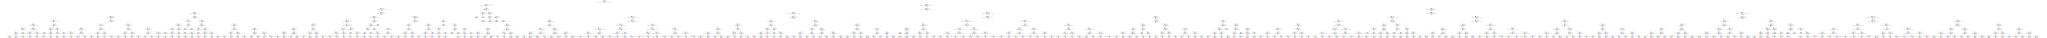

In [367]:

feature_names = X.columns
dot_data = tree.export_graphviz(classifier, out_file='all.dot', filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
g = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(classifier, 
                  feature_names=X.columns,  
                  class_names=class_names, 
                           )
graph = graphviz.Source(dot_data)
graph

In [368]:
pipeline = PMMLPipeline([
("classifier", DecisionTreeClassifier(**params, random_state=42))
])
pipeline.fit(X_train, y_train)
sklearn2pmml(pipeline, "all.pmml", with_repr = True)